# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer Vision is the practice of writing alogorithms which can discover patterns in visual data.
Such as the camera of a self-driving car recognizing the car in front.

## Get the dat

The images we're working with are from the Food101 dataset (101 different classes of food) : https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classess (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **NOTE:** We start with a smaller dataset wo we can experiment quickly and figure what works (or better yet what doesn't work) before scalling up.

In [1]:
# use only google colab
# !pip install wget
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


In [2]:
# import urllib.request
# url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
# filename = 'pizza_steak.zip'
# urllib.request.urlretrieve(url, filename)

In [3]:
# import zipfile

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one the the data.

And for a computer vision proejct... this usually means visualizing many samples of your data.

In [4]:
# !dir pizza_steak

In [5]:
# !dir pizza_steak\train

In [6]:
# !dir pizza_steak\train\steak

In [5]:
# Inspect directory
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [8]:
# Another way to find out how many images are in a file
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_image_train

750

To visualize our images, first let's get the class names progammatically.

In [34]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [68]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    #get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['221048.jpg']
Image shape: (342, 512, 3)


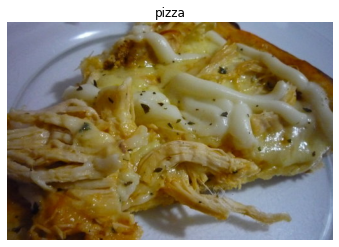

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")


In [12]:
224, 224, 3

(224, 224, 3)

In [13]:
# img return from function
img

array([[[117, 120, 151],
        [119, 122, 153],
        [121, 124, 155],
        ...,
        [112, 128, 161],
        [110, 126, 159],
        [109, 125, 158]],

       [[118, 121, 152],
        [119, 122, 153],
        [120, 123, 154],
        ...,
        [112, 128, 161],
        [111, 127, 160],
        [109, 125, 158]],

       [[119, 122, 153],
        [119, 122, 153],
        [119, 122, 153],
        ...,
        [114, 129, 162],
        [112, 127, 160],
        [111, 126, 159]],

       ...,

       [[ 81,  58,  24],
        [ 79,  56,  22],
        [ 77,  54,  20],
        ...,
        [103, 115, 141],
        [102, 114, 138],
        [101, 113, 137]],

       [[ 78,  55,  21],
        [ 77,  54,  20],
        [ 77,  54,  20],
        ...,
        [105, 117, 143],
        [105, 117, 141],
        [103, 115, 139]],

       [[ 77,  55,  18],
        [ 77,  55,  18],
        [ 77,  54,  20],
        ...,
        [105, 117, 143],
        [106, 118, 142],
        [105, 117, 141]]

In [14]:
# The image we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(342, 512, 3), dtype=uint8, numpy=
array([[[117, 120, 151],
        [119, 122, 153],
        [121, 124, 155],
        ...,
        [112, 128, 161],
        [110, 126, 159],
        [109, 125, 158]],

       [[118, 121, 152],
        [119, 122, 153],
        [120, 123, 154],
        ...,
        [112, 128, 161],
        [111, 127, 160],
        [109, 125, 158]],

       [[119, 122, 153],
        [119, 122, 153],
        [119, 122, 153],
        ...,
        [114, 129, 162],
        [112, 127, 160],
        [111, 126, 159]],

       ...,

       [[ 81,  58,  24],
        [ 79,  56,  22],
        [ 77,  54,  20],
        ...,
        [103, 115, 141],
        [102, 114, 138],
        [101, 113, 137]],

       [[ 78,  55,  21],
        [ 77,  54,  20],
        [ 77,  54,  20],
        ...,
        [105, 117, 143],
        [105, 117, 141],
        [103, 115, 139]],

       [[ 77,  55,  18],
        [ 77,  55,  18],
        [ 77,  54,  20],
        ...,
        [105, 117, 14

In [15]:
# View the image shape
img.shape # returns width, height, colour channels

(342, 512, 3)

> **NOTE:** As we've discussed before, many machine learning models, including neural networks prefer the calues they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is maximun pixel value).

In [16]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.45882353, 0.47058824, 0.59215686],
        [0.46666667, 0.47843137, 0.6       ],
        [0.4745098 , 0.48627451, 0.60784314],
        ...,
        [0.43921569, 0.50196078, 0.63137255],
        [0.43137255, 0.49411765, 0.62352941],
        [0.42745098, 0.49019608, 0.61960784]],

       [[0.4627451 , 0.4745098 , 0.59607843],
        [0.46666667, 0.47843137, 0.6       ],
        [0.47058824, 0.48235294, 0.60392157],
        ...,
        [0.43921569, 0.50196078, 0.63137255],
        [0.43529412, 0.49803922, 0.62745098],
        [0.42745098, 0.49019608, 0.61960784]],

       [[0.46666667, 0.47843137, 0.6       ],
        [0.46666667, 0.47843137, 0.6       ],
        [0.46666667, 0.47843137, 0.6       ],
        ...,
        [0.44705882, 0.50588235, 0.63529412],
        [0.43921569, 0.49803922, 0.62745098],
        [0.43529412, 0.49411765, 0.62352941]],

       ...,

       [[0.31764706, 0.22745098, 0.09411765],
        [0.30980392, 0.21960784, 0.08627451],
        [0.30196078, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in ur images, more specifically we a need way to:

* Load our images
* preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocessing data (get all of the pixel values between 0& 1,  also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255) 
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 139ms/step - loss: 0.5656 - accuracy: 0.7060 - val_loss: 0.4231 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 4s 92ms/step - loss: 0.4254 - accuracy: 0.8060 - val_loss: 0.3325 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 4s 93ms/step - loss: 0.3823 - accuracy: 0.8207 - val_loss: 0.3154 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 4s 91ms/step - loss: 0.3630 - accuracy: 0.8367 - val_loss: 0.3074 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 4s 92ms/step - loss: 0.3454 - accuracy: 0.8547 - val_loss: 0.3285 - val_accuracy: 0.8580


> **Note:** if Kernel died let's check Terminal Alerts :
    zlibwapi.dll Missing Error - https://www.youtube.com/watch?v=oIzMZFbigsU

In [18]:
len(train_data)

47

In [19]:
1500/32 # how batch_size work

46.875

In [23]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

> **Practice/Exercise** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

> Let's replicate the model we've built in a previous section to see if it works with our image data.

> The model we're building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.65808&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false): 

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 89ms/step - loss: 0.9124 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 87ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.6932 - accuracy: 0.4693 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 89ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 86ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [27]:
# Get a summary of model-2
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1)

Model_2 performs terribly... let's try improve this

In [30]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
histroy_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 99ms/step - loss: 3.1888 - accuracy: 0.6433 - val_loss: 0.9707 - val_accuracy: 0.5700
Epoch 2/5
47/47 [==============================] - 4s 93ms/step - loss: 0.7079 - accuracy: 0.6880 - val_loss: 0.4831 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 4s 95ms/step - loss: 0.7677 - accuracy: 0.6967 - val_loss: 0.6103 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 4s 95ms/step - loss: 0.5238 - accuracy: 0.7740 - val_loss: 0.4230 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 4s 95ms/step - loss: 0.4283 - accuracy: 0.8087 - val_loss: 0.5117 - val_accuracy: 0.7660


In [31]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [33]:
15000000/31000

483.8709677419355

> **NOTE:** You can think of trainable **parameters as petterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. We here a series of dense layers has a number of different learnable parameraters connected to  each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**.
    So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different features in an image.

## Binary Classification : Let's Break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied(experiment, experiment, experiment)

### 1. Become one with the data

['732986.jpg']
Image shape: (512, 512, 3)
['54540.jpg']
Image shape: (512, 384, 3)


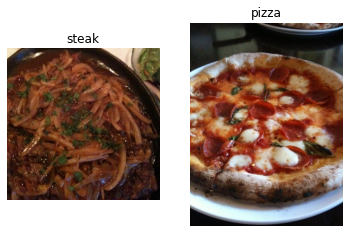

In [8]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [25]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for couple of reasons:
1. 10,000 images(or more)might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,000 images i one hit could result in the model not being able to learn ery well.

Why 32?

because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en

In [10]:
!nvidia-smi

Mon May 30 12:54:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   46C    P8     5W /  N/A |    187MiB /  4096MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
# Load in our image data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of image (height, width)
                                              class_mode="binary", # Type of data you're working with
                                              batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [14]:
# How many batches ae there?
len(train_data)

47

In [15]:
# Train image / batch size
1500/32

46.875

In [17]:
# Get the firsst two images
images[:2], images[0].shape

(array([[[[0.427451  , 0.40784317, 0.3921569 ],
          [0.45098042, 0.41960788, 0.40784317],
          [0.47450984, 0.4431373 , 0.43137258],
          ...,
          [0.5411765 , 0.52156866, 0.49803925],
          [0.54509807, 0.5254902 , 0.5019608 ],
          [0.5411765 , 0.52156866, 0.49803925]],
 
         [[0.39607847, 0.3647059 , 0.3529412 ],
          [0.42352945, 0.3921569 , 0.3803922 ],
          [0.454902  , 0.4156863 , 0.40784317],
          ...,
          [0.54509807, 0.5254902 , 0.5019608 ],
          [0.54901963, 0.5294118 , 0.5058824 ],
          [0.54509807, 0.5254902 , 0.5019608 ]],
 
         [[0.37254903, 0.32941177, 0.3137255 ],
          [0.38431376, 0.34117648, 0.3254902 ],
          [0.3921569 , 0.34901962, 0.33333334],
          ...,
          [0.54901963, 0.53333336, 0.49803925],
          [0.5529412 , 0.5372549 , 0.5019608 ],
          [0.54901963, 0.53333336, 0.49803925]],
 
         ...,
 
         [[0.27450982, 0.23137257, 0.20784315],
          [0.27058

In [19]:
images[7].shape

(224, 224, 3)

In [20]:
# View the first batch of labels
labels

array([1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experimennt and then as  you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [14]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [23]:
# Create the model (this will be our baseline, a layer onvolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # Filter is the number of sliding windows going across an input (higher = more complex model)
          kernel_size=(3, 3), # The size of the sliding window going across an input
          strides=(1, 1), # The size of the step the sliding window takes across an input
          padding="valid", # if "same", output shape is same as input shape. if "valid", output shape gets compressed
          activation="relu",
          input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

> Pratice: Understand what's going on in a Conv2D layer by going through the CNN explaner website 10-20 miniutes:
    https://poloclub.github.io/cnn-explainer/

In [24]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [26]:
# Get a summary the our model
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4.Fit the model

In [27]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [29]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 149ms/step - loss: 1.6280 - accuracy: 0.6487 - val_loss: 0.4547 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 5s 97ms/step - loss: 0.4340 - accuracy: 0.8153 - val_loss: 0.3592 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 4s 95ms/step - loss: 0.3065 - accuracy: 0.8800 - val_loss: 0.3468 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 5s 97ms/step - loss: 0.1807 - accuracy: 0.9407 - val_loss: 0.3726 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 4s 94ms/step - loss: 0.0820 - accuracy: 0.9813 - val_loss: 0.4495 - val_accuracy: 0.8180


### 5. Evaluating the model

It looks like our model is learning something, let's evaluate it.

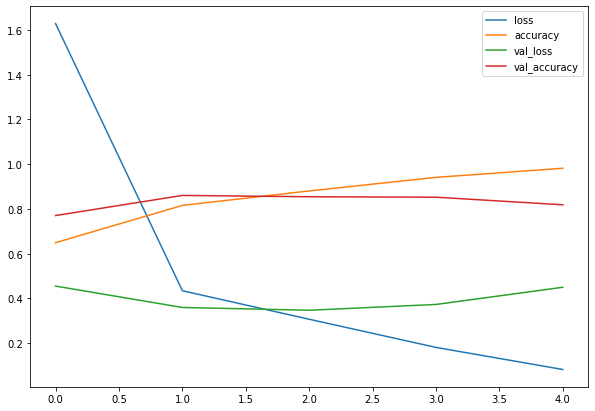

In [31]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [15]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history['val_loss']
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"])) # how many epochs did we run for ?
    
    # Plot loss
    plt.figure()
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

> **NOTE:** When a model's **validation loss starts to increase**, it's likely that the modl is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and this the model's ability to generalize to unseen data will be dimished.

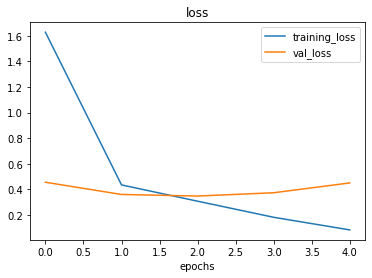

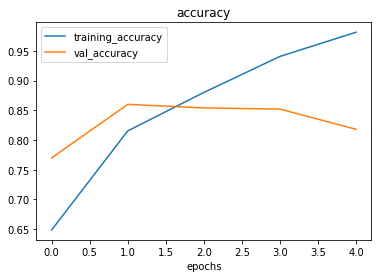

In [38]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> **NOTE:** Ideally the two loss curves(training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters 
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers( such as MaxPool2D)
* Add more data...

> **NOTE:** Reducing overfitting is also known as **regularization**

In [39]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [40]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [42]:
history_5 = model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 112ms/step - loss: 0.6319 - accuracy: 0.6507 - val_loss: 0.4694 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 98ms/step - loss: 0.4792 - accuracy: 0.7833 - val_loss: 0.4065 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 4s 94ms/step - loss: 0.4403 - accuracy: 0.8060 - val_loss: 0.4162 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 4s 90ms/step - loss: 0.4001 - accuracy: 0.8300 - val_loss: 0.3536 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 4s 93ms/step - loss: 0.3833 - accuracy: 0.8313 - val_loss: 0.3743 - val_accuracy: 0.8160


In [43]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

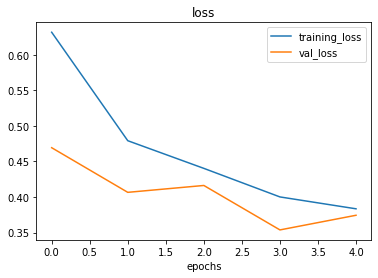

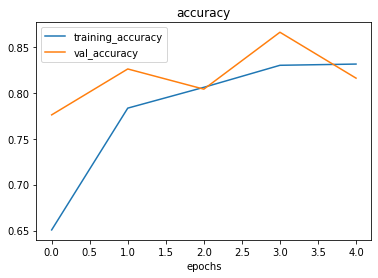

In [44]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [23]:

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, # how much do want to rotate an image?
                                            shear_range=0.2, # how much do you want to shear an image?
                                            zoom_range=0.2, # zoom in randomly on an image
                                            width_shift_range=0.2, # move your image around on the x-axis
                                            height_shift_range=0.2, # move your image around on the y-axis
                                            horizontal_flip=True) # do you want to flip and image ?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **QUESTION:** What is data augmentation?
    
Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [26]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **NOTE:** Data Augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data agumentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!

In [27]:
# Get sample data batches
images, labls = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 3


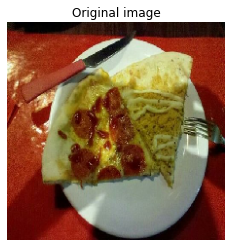

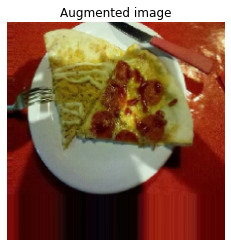

In [29]:
import matplotlib.pyplot as plt

# Show the original images and augmented images
import random
random_number = random.randint(0, 32) # our batch size are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data look like, let's build a model and see how it learns on augmented data.

In [36]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model_6 on augmented training data
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 343ms/step - loss: 0.7249 - accuracy: 0.4913 - val_loss: 0.6798 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 16s 340ms/step - loss: 0.7147 - accuracy: 0.5160 - val_loss: 0.6667 - val_accuracy: 0.5720
Epoch 3/5
47/47 [==============================] - 16s 337ms/step - loss: 0.6582 - accuracy: 0.6287 - val_loss: 0.5455 - val_accuracy: 0.7220
Epoch 4/5
47/47 [==============================] - 16s 338ms/step - loss: 0.6175 - accuracy: 0.6860 - val_loss: 0.4884 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 16s 329ms/step - loss: 0.5885 - accuracy: 0.6993 - val_loss: 0.4784 - val_accuracy: 0.8080


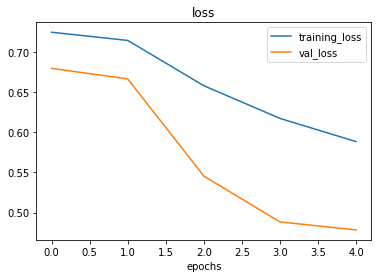

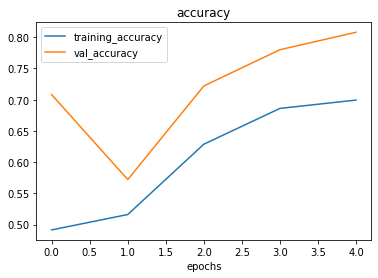

In [38]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [30]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [31]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented shuffle data
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 345ms/step - loss: 0.6527 - accuracy: 0.6400 - val_loss: 0.4708 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 16s 342ms/step - loss: 0.5153 - accuracy: 0.7593 - val_loss: 0.4251 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 16s 347ms/step - loss: 0.4934 - accuracy: 0.7760 - val_loss: 0.4762 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 16s 340ms/step - loss: 0.4918 - accuracy: 0.7680 - val_loss: 0.3753 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 16s 343ms/step - loss: 0.4692 - accuracy: 0.7807 - val_loss: 0.3426 - val_accuracy: 0.8660


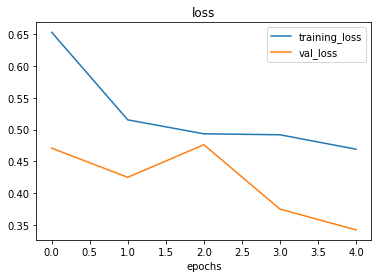

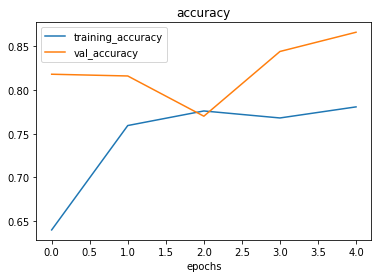

In [32]:
# Plot loss curves 
plot_loss_curves(history_7)

> **NOTE:** When shuffle training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we coud try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **PRACETICE:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [35]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


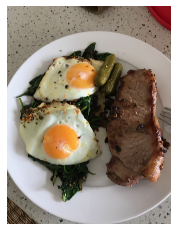

In [36]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [37]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> **NOTE:** When you train a neural network and you want to make a prediction with it on you own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [42]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it
    to (img_shape, img_shape, colour_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [43]:
# Load in and preprocess our custom image
import tensorflow as tf
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [44]:
model_7.predict(steak)

ValueError: in user code:

    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\LENOVO\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\input_spec.py:234 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 224, 3)


In [49]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.89471406]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [48]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [50]:
# We can index the predicted class bby rouding the prediciton probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [51]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, make a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

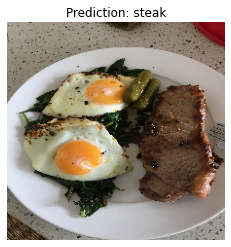

In [52]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on anothe image... this time pizza

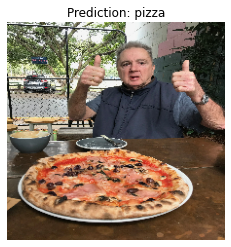

In [55]:
# Dowload another test custom image and make a prediction on it
# !wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg"
pred_and_plot(model_7, "03-pizza-dad.jpeg")

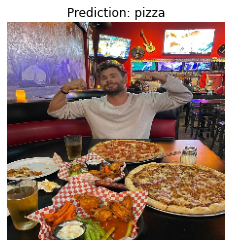

In [56]:
# Another predict
pred_and_plot(model_7, "pizza-chris-hemsworth.jpg")

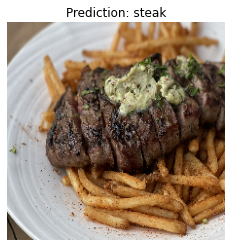

In [57]:
# Another predict
pred_and_plot(model_7, "steak-wiki.jpg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (Overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat basline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become on with the data

In [59]:
# Only use on google colab
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2022-06-01 13:09:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com... 172.217.174.176, 216.58.196.48, 216.58.199.240, ...
Connecting to storage.googleapis.com|172.217.174.176|:443... connected.
ERROR: cannot verify storage.googleapis.com's certificate, issued by `/C=US/O=Google Trust Services LLC/CN=GTS CA 1C3':
  Unable to locally verify the issuer's authority.
ERROR: certificate common name `*.storage.googleapis.com' doesn't match requested host name `storage.googleapis.com'.
To connect to storage.googleapis.com insecurely, use `--no-check-certificate'.
Unable to establish SSL connection.


FileNotFoundError: [Errno 2] No such file or directory: '10_food_classes_all_data.zip'

In [60]:
import urllib.request
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'
filename = '10_food_classes_all_data.zip'
urllib.request.urlretrieve(url, filename)

('10_food_classes_all_data.zip', <http.client.HTTPMessage at 0x1f6e3f34550>)

In [61]:
import zipfile
# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='10_food_classes_all_data.zip' mode='r'>>

In [62]:
import os 

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [64]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [65]:
# Let's get the subdirectories (these are our class name)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['320052.jpg']
Image shape: (382, 512, 3)


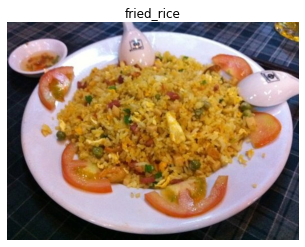

In [73]:
# Visualize, visualize , visualize
import random
img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

In [67]:
random.choice(class_names)

'ice_cream'

### 2. Preprocess the data (prepare it for a model)

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn into batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)... how about we just take their model (also on 10 classes) and use it for our problem...?

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (very similar to previous models but acctually the same CNN Explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # Changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

### 4. Fit a model

In [80]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 71s 294ms/step - loss: 2.1236 - accuracy: 0.2277 - val_loss: 1.9563 - val_accuracy: 0.2932
Epoch 2/5
235/235 [==============================] - 24s 102ms/step - loss: 1.8719 - accuracy: 0.3485 - val_loss: 1.8610 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 24s 101ms/step - loss: 1.6646 - accuracy: 0.4333 - val_loss: 1.8759 - val_accuracy: 0.3476
Epoch 4/5
235/235 [==============================] - 23s 99ms/step - loss: 1.2912 - accuracy: 0.5757 - val_loss: 2.1041 - val_accuracy: 0.3184
Epoch 5/5
235/235 [==============================] - 24s 101ms/step - loss: 0.7825 - accuracy: 0.7444 - val_loss: 2.6224 - val_accuracy: 0.2824


In [77]:
len(train_data)

235

### 5. Evaluate the model

In [81]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 9s 112ms/step - loss: 2.6224 - accuracy: 0.2824


[2.622424840927124, 0.2824000120162964]

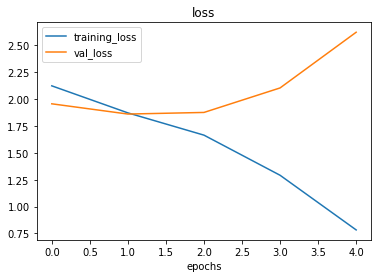

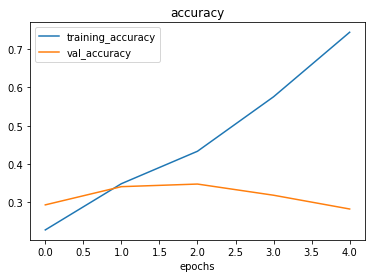

In [82]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

The model is overfitting on training data

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the models hyperparameter (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more daata** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too compllicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [85]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")    
])

model_9.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [87]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 28s 115ms/step - loss: 2.2298 - accuracy: 0.1780 - val_loss: 2.1171 - val_accuracy: 0.2284
Epoch 2/5
235/235 [==============================] - 22s 95ms/step - loss: 1.9264 - accuracy: 0.3325 - val_loss: 2.0475 - val_accuracy: 0.2752
Epoch 3/5
235/235 [==============================] - 23s 96ms/step - loss: 1.5460 - accuracy: 0.4936 - val_loss: 2.0442 - val_accuracy: 0.2948
Epoch 4/5
235/235 [==============================] - 23s 98ms/step - loss: 0.9899 - accuracy: 0.6889 - val_loss: 2.2610 - val_accuracy: 0.2992
Epoch 5/5
235/235 [==============================] - 22s 96ms/step - loss: 0.5201 - accuracy: 0.8523 - val_loss: 2.6750 - val_accuracy: 0.2896


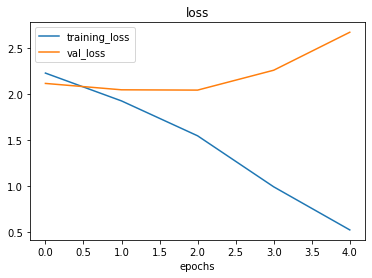

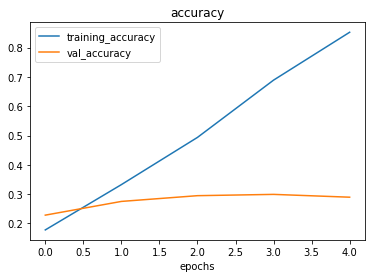

In [88]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [86]:
model_9.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [83]:
model_8.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 53, 53, 10)       

Look like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation???

### Try to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [92]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [93]:
# let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [94]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 78s 330ms/step - loss: 2.2197 - accuracy: 0.1808 - val_loss: 2.0299 - val_accuracy: 0.2572
Epoch 2/5
235/235 [==============================] - 77s 328ms/step - loss: 2.0814 - accuracy: 0.2584 - val_loss: 1.9431 - val_accuracy: 0.3024
Epoch 3/5
235/235 [==============================] - 78s 330ms/step - loss: 2.0471 - accuracy: 0.2717 - val_loss: 1.9199 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 78s 331ms/step - loss: 2.0133 - accuracy: 0.2951 - val_loss: 1.9986 - val_accuracy: 0.3076
Epoch 5/5
235/235 [==============================] - 78s 333ms/step - loss: 1.9902 - accuracy: 0.3087 - val_loss: 1.8690 - val_accuracy: 0.3632


In [95]:
model_8.evaluate(test_data)

79/79 [==============================] - 5s 67ms/step - loss: 2.6224 - accuracy: 0.2824


[2.622425079345703, 0.2824000120162964]

In [96]:
model_10.evaluate(test_data)

79/79 [==============================] - 5s 65ms/step - loss: 1.8690 - accuracy: 0.3632


[1.8689652681350708, 0.36320000886917114]

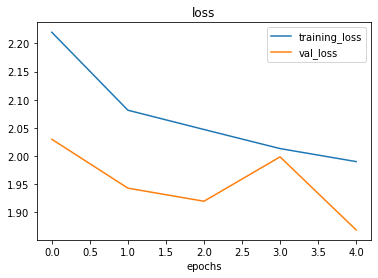

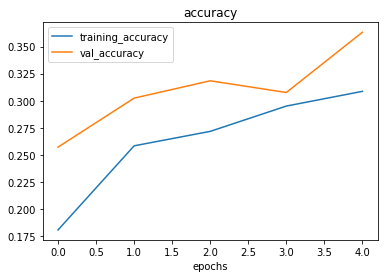

In [98]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

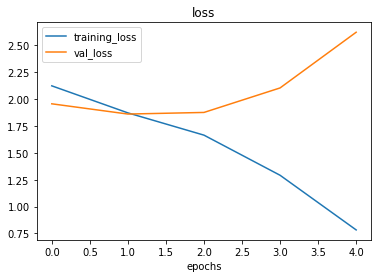

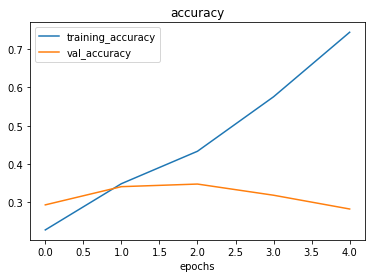

In [99]:
plot_loss_curves(history_8)

That looks much better, the loss curves are much closer to each other than the baseine model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see futher improvements. 

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and truing to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (incresasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images.

In [100]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images

In [112]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, make a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
#     print(len(pred[0]))
#     print(tf.argmax(pred))
    
    # Add in logic for multi-class & get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
    
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

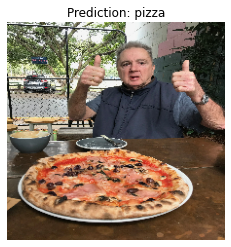

In [113]:
# Make a prediction using model_10
pred_and_plot(model_10,
             filename="03-pizza-dad.jpeg",
             class_names=class_names)

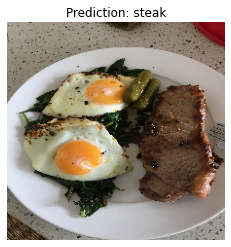

In [114]:
# Make a prediction using model_10
pred_and_plot(model_10,
             filename="03-steak.jpeg",
             class_names=class_names)

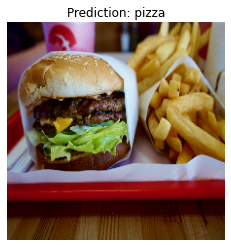

In [115]:
# Make a prediction using model_10
pred_and_plot(model_10,
             filename="03-hamburger.jpeg",
             class_names=class_names)

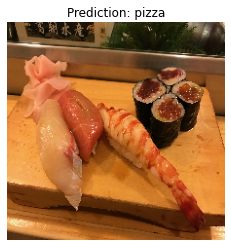

In [116]:
# Make a prediction using model_10
pred_and_plot(model_10,
             filename="03-sushi.jpeg",
             class_names=class_names)

Look like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [117]:
# Save a model
model_10.save("save_trained_model_10")

INFO:tensorflow:Assets written to: save_trained_model_10\assets


In [119]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("save_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 1.8690 - accuracy: 0.3632


[1.8689650297164917, 0.36320000886917114]

In [120]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 5s 65ms/step - loss: 1.8690 - accuracy: 0.3632


[1.8689650297164917, 0.36320000886917114]